In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df = pd.read_csv('balance.csv', index_col=0)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [48]:
# are there any missing values
df.isna().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [49]:
# multiply income column by 1000, updating the original column
df['Income'] = df.Income * 1_000
df.head(2)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14891.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903


In [50]:
# find the ethnic breakdown by percentage
df.Ethnicity.value_counts() / df.shape[0]

Caucasian           0.4975
Asian               0.2550
African American    0.2475
Name: Ethnicity, dtype: float64

In [51]:
# are most people married?
(df.Married.value_counts()['Yes'] / df.shape[0]) > 0.50

True

In [52]:
demographics = df.groupby(['Gender', 'Student', 'Married', 'Ethnicity']).mean()
demographics

Income        Limit  \
Gender Student Married Ethnicity                                     
 Male  No      No      African American  54204.055556  5455.555556   
                       Asian             44305.250000  4279.000000   
                       Caucasian         44224.272727  4527.060606   
               Yes     African American  41602.923077  4575.846154   
                       Asian             39282.148148  4286.666667   
                       Caucasian         48629.842105  4918.736842   
       Yes     No      African American  78496.500000  6633.500000   
                       Asian             17156.000000  4877.000000   
                       Caucasian         39399.000000  5644.250000   
               Yes     African American  57805.666667  4462.666667   
                       Asian             31029.000000  2863.000000   
                       Caucasian         58045.000000  3926.000000   
Female No      No      African American  41816.280000  4430.000000   
                       Asian             37460.200000  4589.800000   
                       Caucasian         40332.636364  4560.575758   
               Yes     African American  52408.800000  5113.450000   
                       Asian             47697.250000  4832.666667   
                       Caucasian         44431.457627  4948.322034   
       Yes     No      African American  52250.500000  4873.500000   
                       Asian             66516.666667  6338.333333   
                       Caucasian         33219.500000  2930.166667   
               Yes     African American  44895.000000  5561.666667   
                       Asian             60651.166667  4901.833333   
                       Caucasian         36271.000000  4204.250000   

                                             Rating     Cards        Age  \
Gender Student Married Ethnicity                                           
 Male  No      No      African American  399.833333  2.555556  59.000000   
                       Asian             320.812500  2.625000  59.687500   
                       Caucasian         340.696970  3.333333  54.666667   
               Yes     African American  345.807692  3.153846  51.769231   
                       Asian             325.703704  3.777778  53.777778   
                       Caucasian         369.438596  2.754386  55.701754   
       Yes     No      African American  489.500000  1.500000  70.500000   
                       Asian             349.666667  3.000000  59.666667   
                       Caucasian         410.500000  2.000000  50.250000   
               Yes     African American  339.333333  3.000000  64.333333   
                       Asian             223.000000  2.000000  66.000000   
                       Caucasian         300.666667  2.333333  52.000000   
Female No      No      African American  333.160000  2.880000  61.320000   
                       Asian             343.600000  3.100000  54.300000   
                       Caucasian         342.424242  3.151515  58.363636   
               Yes     African American  382.850000  3.200000  59.050000   
                       Asian             359.111111  2.527778  49.805556   
                       Caucasian         368.644068  2.847458  56.474576   
       Yes     No      African American  370.000000  3.500000  54.000000   
                       Asian             479.000000  2.666667  43.333333   
                       Caucasian         237.333333  3.500000  48.666667   
               Yes     African American  410.333333  3.333333  43.000000   
                       Asian             372.333333  3.000000  63.500000   
                       Caucasian         320.250000  3.000000  47.250000   

                                         Education      Balance  
Gender Student Married Ethnicity                                 
 Male  No      No      African American  13.611111   591.777778  
                       Asian             12.375000 

In [54]:
# what is the average credit card balance of a female asian married student?
demographics.loc['Female', 'Yes', 'Yes', 'Asian'].loc['Balance']

801.5

In [57]:
# create a dataframe with only students
studentdf = df[df.Student == 'Yes']
studentdf.head(2)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
2,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903
10,71061.0,6819,491,3,41,19,Female,Yes,Yes,African American,1350


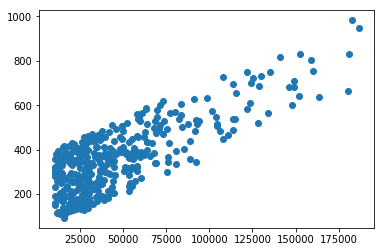

In [60]:
# plot the relationship between income and rating using entire dataset
plt.scatter(df.Income, df.Rating);

In [64]:
# what is the actual correlation between income and rating
df.corr()['Income']['Rating']

0.7913776251121213